In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
gdp = pd.read_csv('gdp_clean.csv')
gdp.head(3)

,Entity,GDP
0,Afghanistan,2.146437e+10
1,Albania,1.160662e+10
2,Algeria,1.628369e+11


In [6]:
gh = pd.read_csv('ghg_copy.csv')
gh.tail(3)

,Entity,Code,Year,Annual nitrous oxide emissions in CO2 equivalents,Annual methane emissions in CO2 equivalents,Annual CO2 emissions
41965,Zimbabwe,ZWE,2019,5279200.0,13599505.0,19822712.0
41966,Zimbabwe,ZWE,2020,5237677.0,13704724.0,18790830.0
41967,Zimbabwe,ZWE,2021,5229954.0,13790684.0,19039368.0


In [12]:
sel = (gh['Entity'] != 'World') & (gh['Year'] >= 1950) & (gh['Year'] <= 2018)
df = gh[sel]

df.columns

Index(['Entity', 'Code', 'Year',
       'Annual nitrous oxide emissions in CO2 equivalents',
       'Annual methane emissions in CO2 equivalents', 'Annual CO2 emissions'],
      dtype='object')

In [18]:
df['nitrous'] = df['Annual nitrous oxide emissions in CO2 equivalents']
df['methane'] = df['Annual methane emissions in CO2 equivalents']
df['co2'] = df['Annual CO2 emissions']

df.head()

<ipython-input-18-d9e8317fa9e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nitrous'] = df['Annual nitrous oxide emissions in CO2 equivalents']
<ipython-input-18-d9e8317fa9e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['methane'] = df['Annual methane emissions in CO2 equivalents']
<ipython-input-18-d9e8317fa9e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,Entity,Code,Year,Annual nitrous oxide emissions in CO2 equivalents,Annual methane emissions in CO2 equivalents,Annual CO2 emissions,notrous,methane,co2,nitrous
100,Afghanistan,AFG,1950,2233092.2,8101785.0,8841232.0,2233092.2,8101785.0,8841232.0,2233092.2
101,Afghanistan,AFG,1951,2294349.2,8234519.0,9508080.0,2294349.2,8234519.0,9508080.0,2294349.2
102,Afghanistan,AFG,1952,2367657.5,8373837.0,10045467.0,2367657.5,8373837.0,10045467.0,2367657.5
103,Afghanistan,AFG,1953,2449182.2,8529120.0,10658576.0,2449182.2,8529120.0,10658576.0,2449182.2
104,Afghanistan,AFG,1954,2535088.5,8691282.0,11049403.0,2535088.5,8691282.0,11049403.0,2535088.5


In [22]:
emissions = df.groupby(df['Entity'])[['nitrous', 'methane', 'co2']].mean()
emissions.head()

,nitrous,methane,co2
Entity,,,
Afghanistan,3.207863e+06,1.161119e+07,7.621214e+06
Africa,2.679068e+08,8.735246e+08,1.820824e+09
Albania,9.822951e+05,3.222584e+06,4.846149e+06
Algeria,3.903884e+06,5.993765e+07,6.659564e+07
Andorra,3.976571e+04,7.381068e+04,2.282831e+05


In [53]:
merged = pd.merge(gdp, emissions, on='Entity', how='inner')
#merged_df.rename(columns={'Mean': 'Global Temperature'}, inplace=True)
sel1 = merged.nlargest(15, 'GDP')
sel2 = merged.nsmallest(15, 'GDP').sort_values(by='GDP', ascending=False)

merged_df = sel1.append(sel2)
merged_df = merged_df.reset_index(drop=True).sort_values(by='GDP')

In [54]:
merged_df

,Entity,GDP,nitrous,methane,co2
29,Dominica,2.790080e+08,1.193386e+04,4.407894e+04,1.108581e+05
28,Sao Tome and Principe,2.817233e+08,7.919099e+03,3.617459e+04,9.568881e+04
27,Comoros,5.002270e+08,4.521412e+04,3.000627e+05,2.173442e+05
26,Saint Lucia,6.943243e+08,2.179515e+04,6.985680e+04,2.323188e+05
25,Seychelles,7.447005e+08,1.073590e+04,4.073800e+04,1.797484e+05
24,Cape Verde,1.104648e+09,4.869210e+04,1.146537e+05,2.551934e+05
23,Djibouti,1.123864e+09,1.609450e+05,5.646939e+05,2.540776e+05
22,Guinea-Bissau,1.187899e+09,4.960539e+05,1.135454e+06,2.076320e+06
21,Gambia,1.417151e+09,2.528226e+05,7.947505e+05,1.101147e+06
20,Lesotho,2.548928e+09,6.056245e+05,1.361984e+06,1.808157e+06


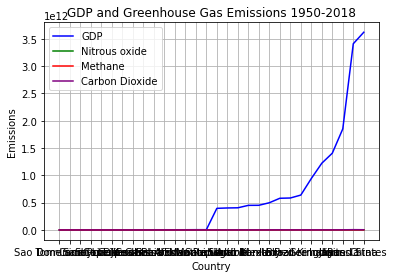

In [55]:
plt.plot(merged_df['Entity'], merged_df['GDP'], label='GDP', color='blue')

# Graficar las emisiones de los diferentes gases
plt.plot(merged_df['Entity'], merged_df['nitrous'], label='Nitrous oxide', color='green')
plt.plot(merged_df['Entity'], merged_df['methane'], label='Methane', color='red')
plt.plot(merged_df['Entity'], merged_df['co2'], label='Carbon Dioxide', color='purple')

# Etiquetas y título del gráfico
plt.xlabel('Country')
plt.ylabel('Emissions')
plt.title('GDP and Greenhouse Gas Emissions 1950-2018')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

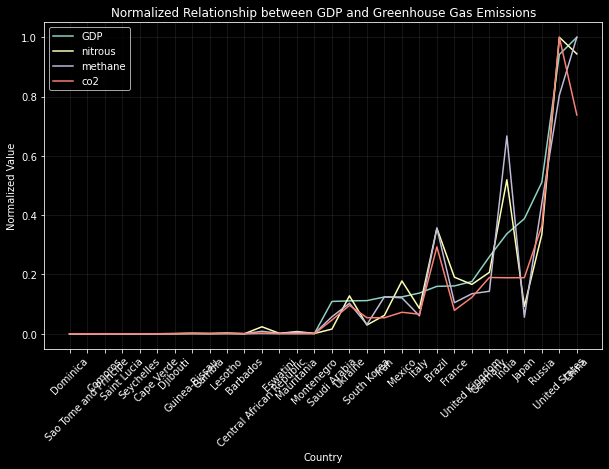

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

plt.style.use('dark_background')

# Normalizar las columnas que deseas trazar
cols_to_normalize = ['GDP', 'nitrous', 
                    'methane', 'co2']
df_normalized = merged_df.copy()  # Crear una copia del DataFrame original
df_normalized[cols_to_normalize] = scaler.fit_transform(df_normalized[cols_to_normalize])

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar las columnas normalizadas
for col in cols_to_normalize:
    plt.plot(df_normalized['Entity'], df_normalized[col], label=col)

plt.xticks(rotation=45)

# Etiquetas y título del gráfico
plt.xlabel('Country')
plt.ylabel('Normalized Value')
plt.title('Normalized Relationship between GDP and Greenhouse Gas Emissions')
plt.legend()

# Mostrar el gráfico
plt.grid(True, alpha=0.1)
plt.show()

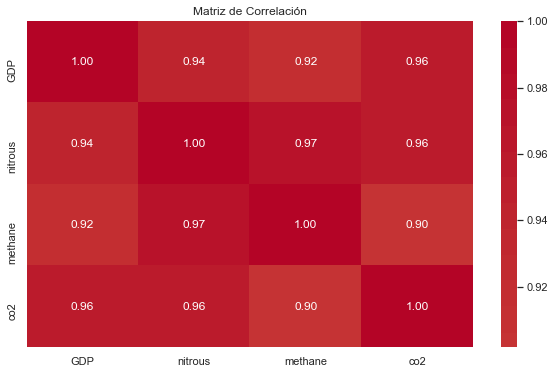

In [67]:
correlation_matrix = merged_df.corr()


import seaborn as sns
sns.set(style="white")
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()